In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('kick-or-not')
jovian.set_colab_id('14XEsoBLb2QIj9ac81k-7f0ngv4yKCsFF')

     |████████████████████████████████| 68 kB 3.6 MB/s 


# Don't Get Kicked

Use the "Run" button to execute the code.

## Project Overview

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. **The auto community calls these unfortunate purchases "kicks"**.

Kicked cars often result when there are **tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem**. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

**The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy)**.

## Install Dependencies

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [5]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [6]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Download the Dataset

### Downloading the Dataset

In [7]:
od.download('https://www.kaggle.com/c/DontGetKicked/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: utkarshtomar736
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 67.0MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [8]:
os.listdir('./DontGetKicked')

['example_entry.csv',
 'training.zip',
 'Carvana_Data_Dictionary.txt',
 'test.zip',
 'training.csv',
 'test.csv']

### Read the Files

In [9]:
# Dataset for Training and Validation
raw_df = pd.read_csv('./DontGetKicked/training.csv')

# Dataset for Test
test_inputs = pd.read_csv('./DontGetKicked/test.csv')

# Sample dataset for the output format
sample_df = pd.read_csv('./DontGetKicked/example_entry.csv')

In [10]:
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [11]:
test_inputs

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [12]:
sample_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


### Train-Val-Test Split

In [ ]:
# To avoid overfitting we need a validation set to validate the model made
# using training dataset

input_cols = raw_df.columns[2:]
target_cols = raw_df.columns[1]

inputs_df = raw_df[input_cols].copy()
targets = raw_df[target_cols].copy()

In [ ]:
from sklearn.model_selection import train_test_split

data_var = train_test_split(inputs_df,
                            targets,
                            test_size=0.25,
                            stratify=targets,
                            random_state=42)

train_inputs, val_inputs, train_targets, val_targets = data_var

## Explorotary Data Analysis

### TBD

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54737 entries, 49908 to 57086
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          54737 non-null  object 
 1   Auction                            54737 non-null  object 
 2   VehYear                            54737 non-null  int64  
 3   VehicleAge                         54737 non-null  int64  
 4   Make                               54737 non-null  object 
 5   Model                              54737 non-null  object 
 6   Trim                               52940 non-null  object 
 7   SubModel                           54731 non-null  object 
 8   Color                              54731 non-null  object 
 9   Transmission                       54730 non-null  object 
 10  WheelTypeID                        52334 non-null  float64
 11  WheelType                          52330 non-null 

In [ ]:
train_inputs.describe()

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,54737.000000,54737.000000,52334.000000,54737.000000,54721.000000,54721.000000,54721.000000,54721.000000,54506.000000,54506.000000,54506.000000,54506.000000,54737.000000,54737.000000,54737.000000,54737.000000,54737.000000
mean,2005.344904,4.174178,1.496064,71487.073570,6126.861973,7372.123536,8495.061147,9849.837064,6130.937878,7390.043115,8773.640590,10144.149562,26351.140088,58024.093575,6729.629425,0.024353,1278.754426
std,1.730645,1.708749,0.521208,14583.567985,2462.208907,2722.692189,3157.837989,3386.818918,2437.016746,2689.517941,3093.838619,3314.394100,25699.793483,26152.381419,1761.813015,0.154143,602.393423
min,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,225.000000,0.000000,462.000000
25%,2004.000000,3.000000,1.000000,61766.000000,4273.000000,5404.000000,6268.000000,7490.000000,4273.000000,5405.250000,6534.000000,7778.250000,17212.000000,32124.000000,5430.000000,0.000000,837.000000
50%,2005.000000,4.000000,1.000000,73304.000000,6092.000000,7303.000000,8456.000000,9808.000000,6060.500000,7315.000000,8746.500000,10113.000000,19662.000000,73108.000000,6715.000000,0.000000,1169.000000
75%,2007.000000,5.000000,2.000000,82432.000000,7766.000000,9026.000000,10644.000000,12082.000000,7735.000000,9018.000000,10906.750000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,2010.000000,9.000000,3.000000,115717.000000,32250.000000,35215.000000,37885.000000,41482.000000,32250.000000,35215.000000,38151.000000,41062.000000,99761.000000,99224.000000,38785.000000,1.000000,7498.000000


### Numerical and Categorical Features

In [ ]:
# Number of numerical and categorical features are:
train_inputs.dtypes.value_counts()

object     15
float64    10
int64       7
dtype: int64

>There are **15 Categorical Features** and **17 Numereical Features** in the training Dataset.

In [ ]:
train_targets.dtype

dtype('int64')

>The Target is a **Numerical Feature**

In [ ]:
# Numeric Columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns
categoric_cols = train_inputs.select_dtypes('object').columns.tolist()

#### Numerical Data Visualization

In [ ]:
train_inputs[numeric_cols]

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
49908,2002,7,2.0,80551,2622.0,3740.0,3332.0,4539.0,2622.0,3740.0,3332.0,4539.0,20234,87105,4000.0,0,2063
5554,2005,4,2.0,81685,7020.0,8364.0,8082.0,9533.0,6085.0,7515.0,7072.0,8616.0,835,85040,6390.0,0,594
65480,2004,5,1.0,95251,9343.0,10222.0,10590.0,11540.0,7778.0,8982.0,11083.0,12596.0,3453,84087,9650.0,0,620
53884,2008,2,1.0,53741,7048.0,7614.0,11006.0,11599.0,7269.0,7898.0,10834.0,11413.0,99761,74135,6400.0,0,754
66182,2005,4,1.0,46676,4173.0,5549.0,5007.0,6493.0,3618.0,5175.0,4407.0,6089.0,17675,28273,4920.0,0,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,2007,2,1.0,94600,8168.0,10259.0,12807.0,14637.0,8529.0,10559.0,12340.0,14238.0,17212,76040,6470.0,0,1053
41811,2005,5,1.0,70813,3720.0,4917.0,6568.0,7953.0,3769.0,4551.0,6902.0,7547.0,5546,33619,5935.0,0,1155
67791,2008,2,2.0,45605,5560.0,6203.0,9148.0,9718.0,6346.0,6729.0,9810.0,10073.0,25100,78754,7130.0,0,482
40656,2002,7,1.0,66189,5512.0,6802.0,6453.0,7846.0,5345.0,6881.0,6273.0,7931.0,18111,29532,8370.0,0,1223


In [ ]:
# Convert for train_inputs df

# Columns with low numerical value
lo_col = ['VehicleAge', 'WheelTypeID', 'IsOnlineSale']

# Columns with high numerical value
hi_col = ['VehOdo',
          'MMRAcquisitionAuctionAveragePrice',
          'MMRAcquisitionAuctionCleanPrice',
          'MMRAcquisitionRetailAveragePrice',
          'MMRAcquisitonRetailCleanPrice',
          'MMRCurrentAuctionAveragePrice',
          'MMRCurrentAuctionCleanPrice',
          'MMRCurrentRetailAveragePrice',
          'MMRCurrentRetailCleanPrice',
          'BYRNO', 'VNZIP1', 'VehBCost',
          'WarrantyCost']

In [ ]:
train_inputs[lo_col]

,VehicleAge,WheelTypeID,IsOnlineSale
49908,7,2.0,0
5554,4,2.0,0
65480,5,1.0,0
53884,2,1.0,0
66182,4,1.0,0
...,...,...,...
22569,2,1.0,0
41811,5,1.0,0
67791,2,2.0,0
40656,7,1.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


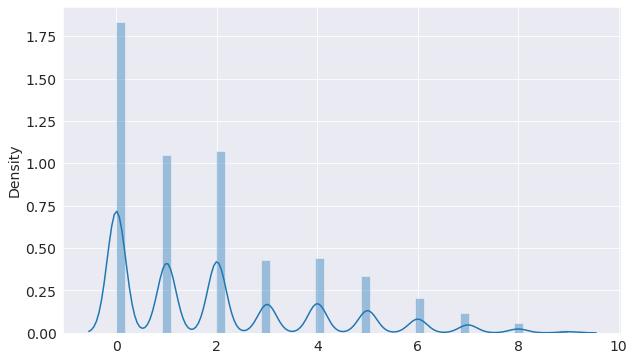

In [ ]:
sns.distplot(train_inputs[lo_col])

In [ ]:
train_inputs[hi_col]

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,WarrantyCost
49908,80551,2622.0,3740.0,3332.0,4539.0,2622.0,3740.0,3332.0,4539.0,20234,87105,4000.0,2063
5554,81685,7020.0,8364.0,8082.0,9533.0,6085.0,7515.0,7072.0,8616.0,835,85040,6390.0,594
65480,95251,9343.0,10222.0,10590.0,11540.0,7778.0,8982.0,11083.0,12596.0,3453,84087,9650.0,620
53884,53741,7048.0,7614.0,11006.0,11599.0,7269.0,7898.0,10834.0,11413.0,99761,74135,6400.0,754
66182,46676,4173.0,5549.0,5007.0,6493.0,3618.0,5175.0,4407.0,6089.0,17675,28273,4920.0,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,94600,8168.0,10259.0,12807.0,14637.0,8529.0,10559.0,12340.0,14238.0,17212,76040,6470.0,1053
41811,70813,3720.0,4917.0,6568.0,7953.0,3769.0,4551.0,6902.0,7547.0,5546,33619,5935.0,1155
67791,45605,5560.0,6203.0,9148.0,9718.0,6346.0,6729.0,9810.0,10073.0,25100,78754,7130.0,482
40656,66189,5512.0,6802.0,6453.0,7846.0,5345.0,6881.0,6273.0,7931.0,18111,29532,8370.0,1223


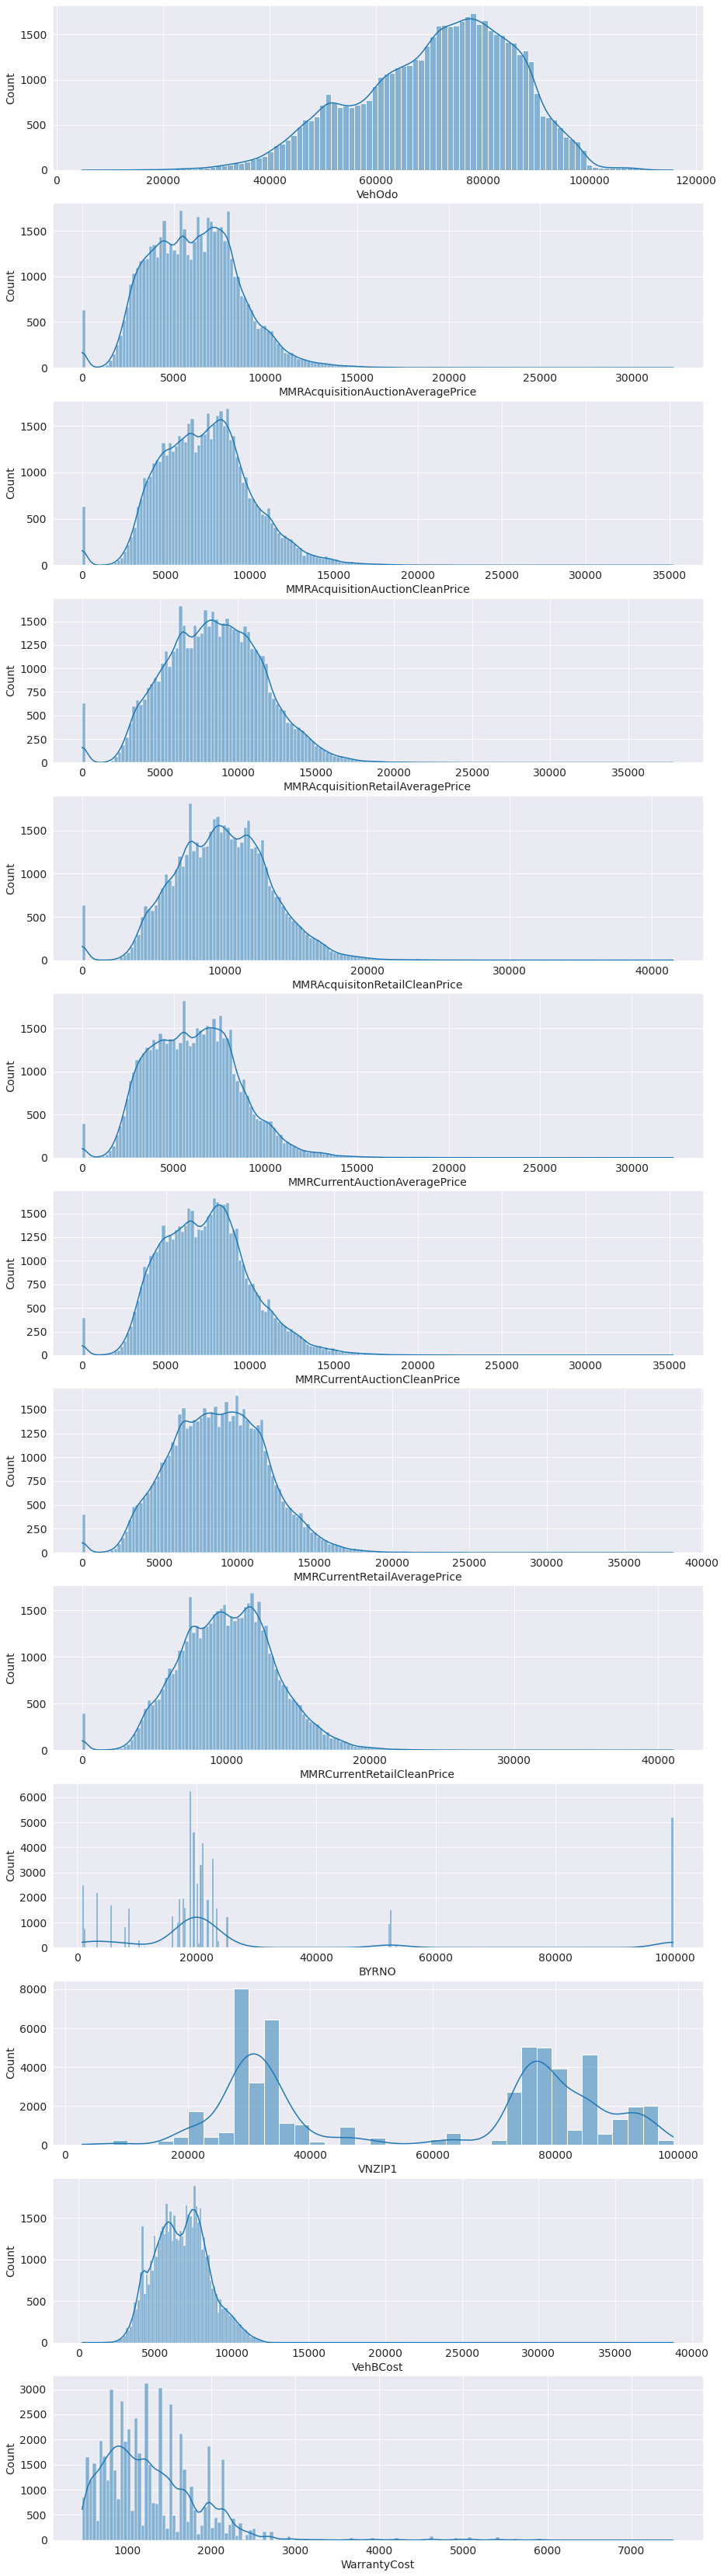

In [ ]:
fig, axs = plt.subplots(ncols=1,nrows=13,figsize=(15,60))
for i in range(0, 13):
  hist_plot = sns.histplot(x=train_inputs[hi_col].columns[i], data=train_inputs, kde=True, ax=axs[i])

In [ ]:
# raw_df[raw_cat_cols]

#### Categorical Features Visualization 

In [ ]:
# train_inputs.Color.value_counts().plot(kind='bar')

### Missing Values

In [ ]:
# Checking the Missing Values
missing_values = train_inputs.isna().sum()
missing_values

PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1797
SubModel                                 6
Color                                    6
Transmission                             7
WheelTypeID                           2403
WheelType                             2407
VehOdo                                   0
Nationality                              3
Size                                     3
TopThreeAmericanName                     3
MMRAcquisitionAuctionAveragePrice       16
MMRAcquisitionAuctionCleanPrice         16
MMRAcquisitionRetailAveragePrice        16
MMRAcquisitonRetailCleanPrice           16
MMRCurrentAuctionAveragePrice          231
MMRCurrentAuctionCleanPrice            231
MMRCurrentRetailAveragePrice           231
MMRCurrentR

#### HeatMap for Missing Values

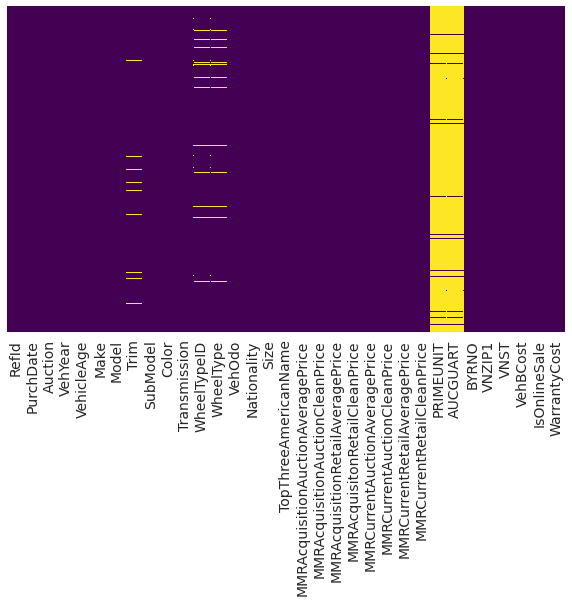

In [ ]:
# Lets visualize the missing values
sns.heatmap(data=test_inputs.isna(), yticklabels = False, cbar=False, cmap='viridis')

#### Percentage of Missing Values

In [ ]:
missing_percentage = np.around(missing_values*100/len(train_inputs), 2)
missing_percentage

PurchDate                             0.00
Auction                               0.00
VehYear                               0.00
VehicleAge                            0.00
Make                                  0.00
Model                                 0.00
Trim                                  3.28
SubModel                              0.01
Color                                 0.01
Transmission                          0.01
WheelTypeID                           4.39
WheelType                             4.40
VehOdo                                0.00
Nationality                           0.01
Size                                  0.01
TopThreeAmericanName                  0.01
MMRAcquisitionAuctionAveragePrice     0.03
MMRAcquisitionAuctionCleanPrice       0.03
MMRAcquisitionRetailAveragePrice      0.03
MMRAcquisitonRetailCleanPrice         0.03
MMRCurrentAuctionAveragePrice         0.42
MMRCurrentAuctionCleanPrice           0.42
MMRCurrentRetailAveragePrice          0.42
MMRCurrentR

In [ ]:
# Columns with missing values
missing_percentage[missing_percentage != 0.00]

Trim                                  3.28
SubModel                              0.01
Color                                 0.01
Transmission                          0.01
WheelTypeID                           4.39
WheelType                             4.40
Nationality                           0.01
Size                                  0.01
TopThreeAmericanName                  0.01
MMRAcquisitionAuctionAveragePrice     0.03
MMRAcquisitionAuctionCleanPrice       0.03
MMRAcquisitionRetailAveragePrice      0.03
MMRAcquisitonRetailCleanPrice         0.03
MMRCurrentAuctionAveragePrice         0.42
MMRCurrentAuctionCleanPrice           0.42
MMRCurrentRetailAveragePrice          0.42
MMRCurrentRetailCleanPrice            0.42
PRIMEUNIT                            95.38
AUCGUART                             95.38
dtype: float64

>Data Columns **`'Trim','WheelTypeID', 'WheelType', MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice'`**</br>
seem to be missing more than few values and could be **Imputed**.

>But Columns **`PRICEUNIT`** and **`AUCGUART`** miss more than **95%** data and couldn't easily be Imputed.</br>
Therefore, would be better to **drop these features**.

### Data Imbalance

In [ ]:
train_targets.value_counts()

0    48005
1     6732
Name: IsBadBuy, dtype: int64

([<matplotlib.patches.Wedge at 0x7fde5e587690>,
 [Text(-1.0189078173671002, 0.41452003535198656, '0'),
  Text(1.0189078173671002, -0.41452003535198667, '1')],
 [Text(-0.5557679003820546, 0.2261018374647199, '87.70'),
  Text(0.5557679003820546, -0.22610183746471998, '12.30')])

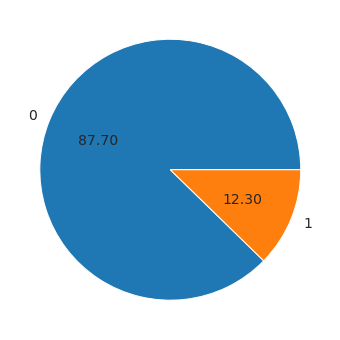

In [ ]:
plt.pie(train_targets.value_counts(), labels = train_targets.value_counts().index, autopct='%.2f')

In [ ]:
# raw_df[raw_num_cols]

In [ ]:
# plt.subplots(figsize=(100,50))
# sns.boxplot(data=raw_df, orient='v')

In [ ]:
# sns.barplot(x='VehYear', y='IsBadBuy',data=raw_df)

In [ ]:
# raw_df[raw_cat_cols]
# subtract {PRIMEUNIT} from cat_cols

In [ ]:
# sns.pairplot(raw_df[raw_num_cols])

### Correlation Plot

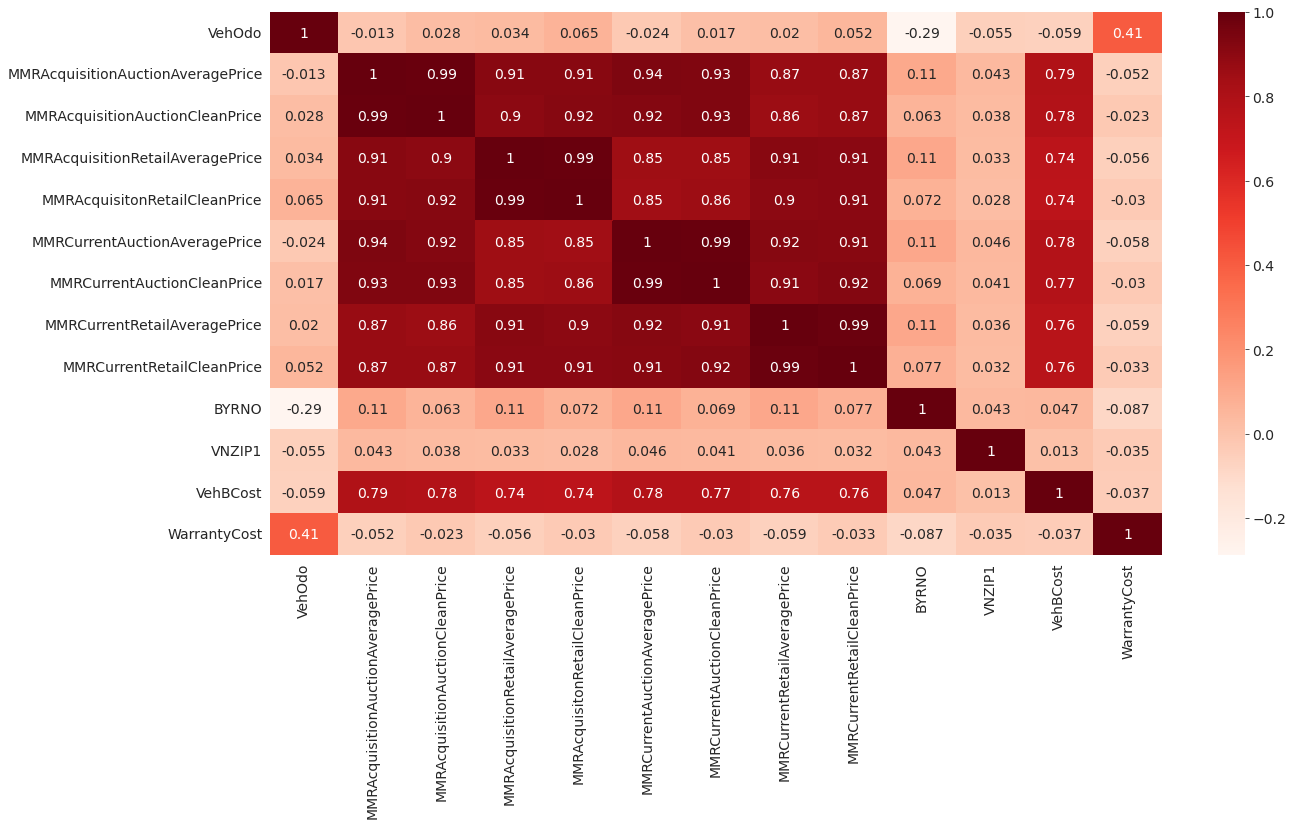

In [ ]:
rel_hi = train_inputs[hi_col].corr()

plt.subplots(figsize=(20,10))
sns.heatmap(rel_hi, cmap='Reds', annot=True)

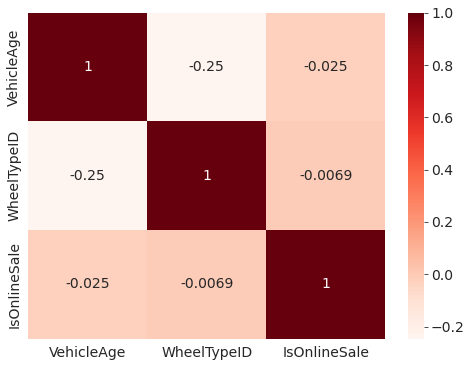

In [ ]:
rel_lo = train_inputs[lo_col].corr()

plt.subplots(figsize=(8,6))
sns.heatmap(rel_lo, cmap='Reds', annot=True)

### Outliers

In [ ]:
box_list1 = ['BYRNO', 'VehBCost', 'WarrantyCost']

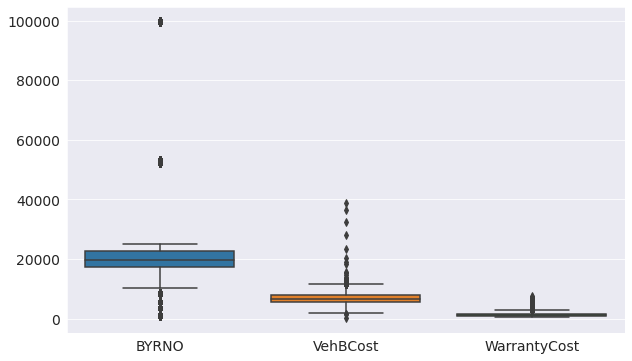

In [ ]:
sns.boxplot(data = train_inputs[box_list1])

In [ ]:
box_list2 = ['MMRAcquisitionAuctionAveragePrice',
             'MMRAcquisitionAuctionCleanPrice',
             'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice',
             'MMRCurrentAuctionAveragePrice',
             'MMRCurrentAuctionCleanPrice',
             'MMRCurrentRetailAveragePrice',
             'MMRCurrentRetailCleanPrice']

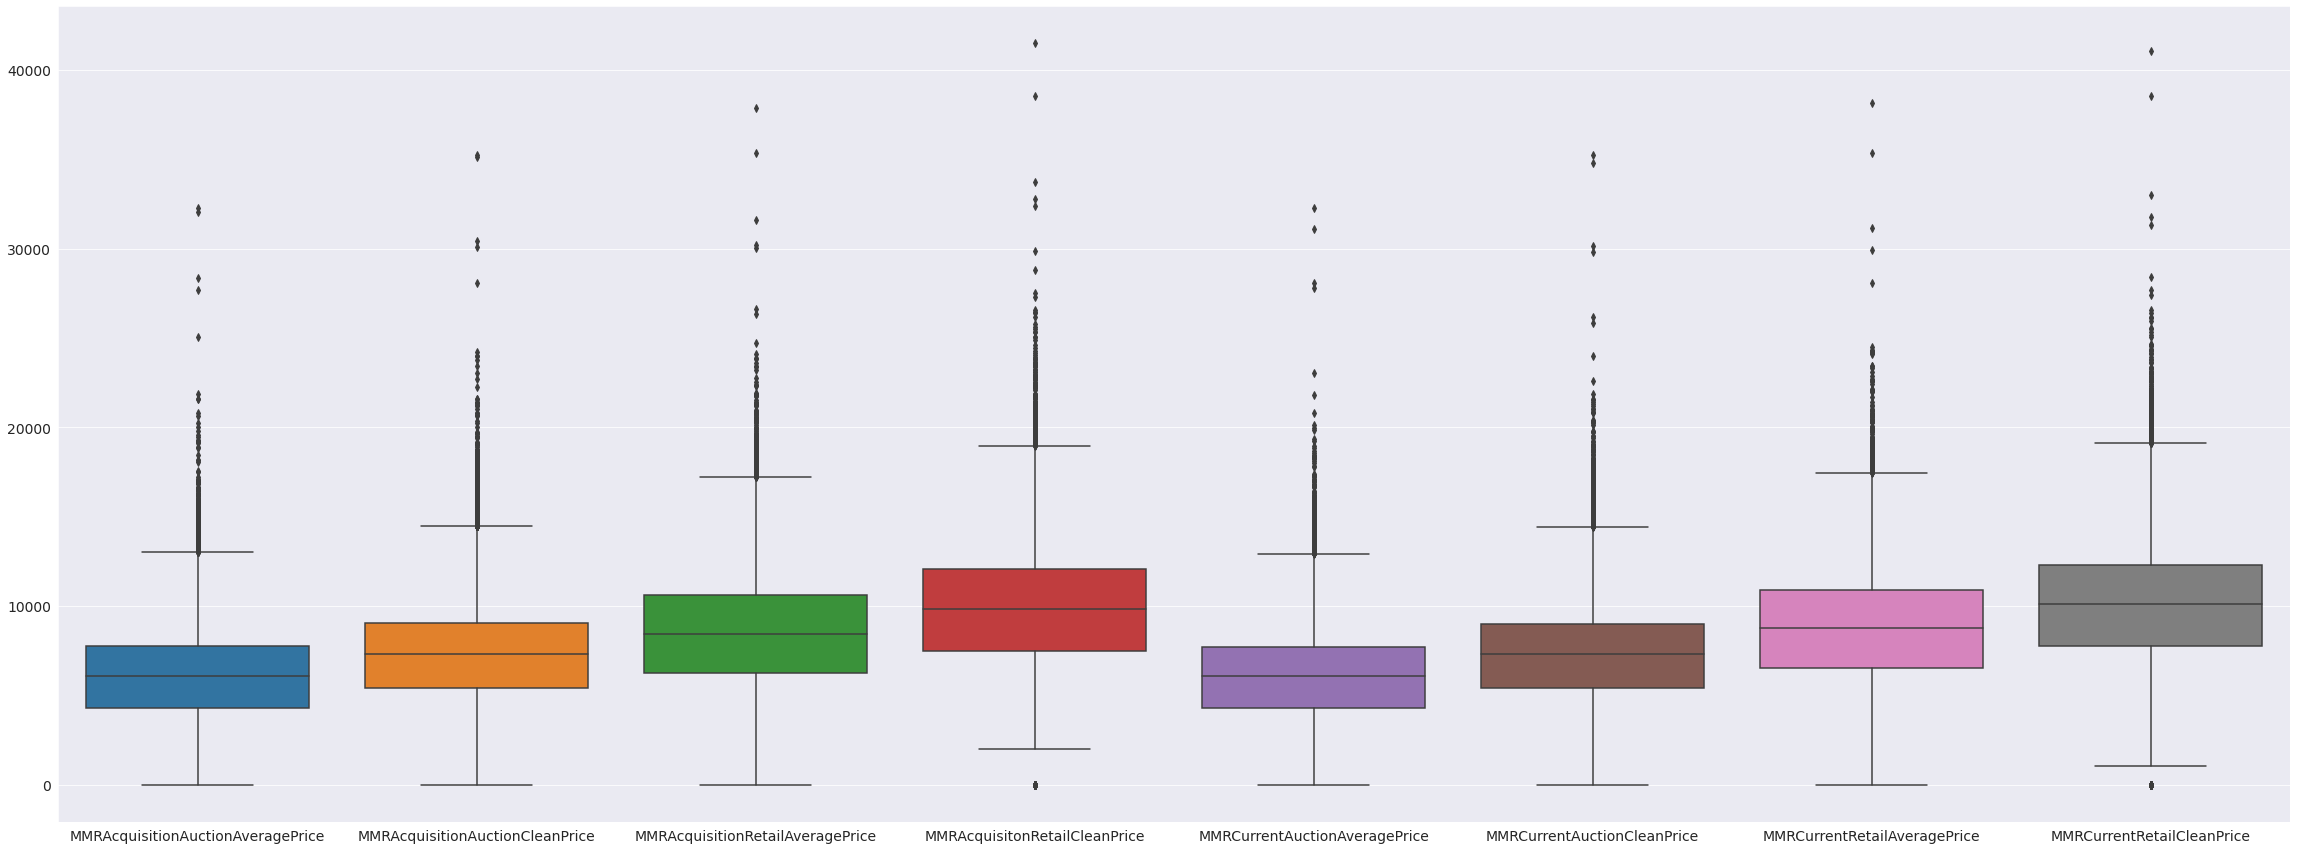

In [ ]:
plt.subplots(figsize=(40,15))
sns.boxplot(data = train_inputs[box_list2])

## Prepare the Dataset

### Cleaning Data

Here we will drop the features that are not usefull and transform some features into more usefull columns

Dropping Highly correlated data

```'MMRAcquisitionAuctionAveragePrice',
'MMRAcquisitionAuctionCleanPrice',
'MMRAcquisitionRetailAveragePrice',
'MMRAcquisitonRetailCleanPrice',
'MMRCurrentAuctionAveragePrice',
'MMRCurrentAuctionCleanPrice',
'MMRCurrentRetailAveragePrice',
'MMRCurrentRetailCleanPrice'```

In [ ]:
hi_cor_col = ["MMRCurrentAuctionAveragePrice",
              "MMRCurrentAuctionCleanPrice",
              "MMRCurrentRetailAveragePrice",
              "MMRCurrentRetailCleanPrice",
              "MMRAcquisitionAuctionCleanPrice",
              "MMRAcquisitonRetailCleanPrice",]

for cor_col in hi_cor_col:
  train_inputs.drop(cor_col, axis=1, inplace=True)
  val_inputs.drop(cor_col, axis=1, inplace=True)
  test_inputs.drop(cor_col, axis=1, inplace=True)

In [ ]:
test_inputs

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,5935.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5362.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,11564.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3263.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,5914.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,8987.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,10999.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,7972.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,9137.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


Dropping Features `PRIMEUNIT` and `AUCGUART` due to excessive missing data.

In [ ]:
train_inputs.drop(['PRIMEUNIT', 'AUCGUART'], axis=1, inplace=True)
val_inputs.drop(['PRIMEUNIT', 'AUCGUART'], axis=1, inplace=True)
test_inputs.drop(['PRIMEUNIT', 'AUCGUART'], axis=1, inplace=True)
train_inputs

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
49908,4/10/2009,MANHEIM,2002,7,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L FFV SE,GREEN,AUTO,2.0,Covers,80551,AMERICAN,VAN,CHRYSLER,2622.0,3332.0,20234,87105,NM,4000.0,0,2063
5554,9/8/2009,MANHEIM,2005,4,MITSUBISHI,OUTLANDER 2WD 4C 2.4,LS,4D SPORT UTILITY LS,BEIGE,AUTO,2.0,Covers,81685,OTHER ASIAN,CROSSOVER,OTHER,7020.0,8082.0,835,85040,AZ,6390.0,0,594
65480,8/19/2009,MANHEIM,2004,5,TOYOTA,TUNDRA PICKUP 2WD V6,SR5,EXT CAB 3.4L SR5,GREY,AUTO,1.0,Alloy,95251,TOP LINE ASIAN,LARGE TRUCK,OTHER,9343.0,10590.0,3453,84087,UT,9650.0,0,620
53884,1/21/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,BLUE,AUTO,1.0,Alloy,53741,AMERICAN,MEDIUM,CHRYSLER,7048.0,11006.0,99761,74135,OK,6400.0,0,754
66182,9/10/2009,ADESA,2005,4,DODGE,STRATUS 4C 2.4L I4 M,SXT,4D SEDAN,BLUE,AUTO,1.0,Alloy,46676,AMERICAN,MEDIUM,CHRYSLER,4173.0,5007.0,17675,28273,NC,4920.0,0,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,12/10/2009,MANHEIM,2007,2,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,RED,AUTO,1.0,Alloy,94600,AMERICAN,SMALL SUV,FORD,8168.0,12807.0,17212,76040,TX,6470.0,0,1053
41811,11/18/2010,MANHEIM,2005,5,FORD,FOCUS,ZX3,2D COUPE ZX3,GREY,AUTO,1.0,Alloy,70813,AMERICAN,COMPACT,FORD,3720.0,6568.0,5546,33619,FL,5935.0,0,1155
67791,9/21/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN LX,BLUE,AUTO,2.0,Covers,45605,OTHER ASIAN,MEDIUM,OTHER,5560.0,9148.0,25100,78754,TX,7130.0,0,482
40656,2/26/2009,MANHEIM,2002,7,FORD,EXPEDITION 2WD V8 5.,Edd,4D SUV 5.4L EDDIE BAUER,WHITE,AUTO,1.0,Alloy,66189,AMERICAN,LARGE SUV,FORD,5512.0,6453.0,18111,29532,SC,8370.0,0,1223


Dropping less important features as well

In [ ]:
to_drop_feat = ['BYRNO', 'VNZIP1', 'VNST', 'VehicleAge', 'WheelType']

for feature in to_drop_feat:
  train_inputs.drop(feature, axis=1, inplace=True)
  val_inputs.drop(feature, axis=1, inplace=True)
  test_inputs.drop(feature, axis=1, inplace=True)

In [ ]:
train_inputs

,PurchDate,Auction,VehYear,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
49908,4/10/2009,MANHEIM,2002,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L FFV SE,GREEN,AUTO,2.0,80551,AMERICAN,VAN,CHRYSLER,2622.0,3332.0,4000.0,0,2063
5554,9/8/2009,MANHEIM,2005,MITSUBISHI,OUTLANDER 2WD 4C 2.4,LS,4D SPORT UTILITY LS,BEIGE,AUTO,2.0,81685,OTHER ASIAN,CROSSOVER,OTHER,7020.0,8082.0,6390.0,0,594
65480,8/19/2009,MANHEIM,2004,TOYOTA,TUNDRA PICKUP 2WD V6,SR5,EXT CAB 3.4L SR5,GREY,AUTO,1.0,95251,TOP LINE ASIAN,LARGE TRUCK,OTHER,9343.0,10590.0,9650.0,0,620
53884,1/21/2010,OTHER,2008,DODGE,CALIBER,SE,4D WAGON,BLUE,AUTO,1.0,53741,AMERICAN,MEDIUM,CHRYSLER,7048.0,11006.0,6400.0,0,754
66182,9/10/2009,ADESA,2005,DODGE,STRATUS 4C 2.4L I4 M,SXT,4D SEDAN,BLUE,AUTO,1.0,46676,AMERICAN,MEDIUM,CHRYSLER,4173.0,5007.0,4920.0,0,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,12/10/2009,MANHEIM,2007,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,RED,AUTO,1.0,94600,AMERICAN,SMALL SUV,FORD,8168.0,12807.0,6470.0,0,1053
41811,11/18/2010,MANHEIM,2005,FORD,FOCUS,ZX3,2D COUPE ZX3,GREY,AUTO,1.0,70813,AMERICAN,COMPACT,FORD,3720.0,6568.0,5935.0,0,1155
67791,9/21/2010,ADESA,2008,KIA,SPECTRA,EX,4D SEDAN LX,BLUE,AUTO,2.0,45605,OTHER ASIAN,MEDIUM,OTHER,5560.0,9148.0,7130.0,0,482
40656,2/26/2009,MANHEIM,2002,FORD,EXPEDITION 2WD V8 5.,Edd,4D SUV 5.4L EDDIE BAUER,WHITE,AUTO,1.0,66189,AMERICAN,LARGE SUV,FORD,5512.0,6453.0,8370.0,0,1223


Let's convert `PurchDate` column into datecolumn and extract different parts of date.

In [ ]:
def split_date(df):
    df['PurchDate'] = pd.to_datetime(df['PurchDate'])
    df['PurchYear'] = df.PurchDate.dt.year
    df['PurchMonth'] = df.PurchDate.dt.month

In [ ]:
split_date(train_inputs)
split_date(val_inputs)
split_date(test_inputs)

In [ ]:
train_inputs

,PurchDate,Auction,VehYear,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
49908,2009-04-10,MANHEIM,2002,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L FFV SE,GREEN,AUTO,2.0,80551,AMERICAN,VAN,CHRYSLER,2622.0,3332.0,4000.0,0,2063,2009,4
5554,2009-09-08,MANHEIM,2005,MITSUBISHI,OUTLANDER 2WD 4C 2.4,LS,4D SPORT UTILITY LS,BEIGE,AUTO,2.0,81685,OTHER ASIAN,CROSSOVER,OTHER,7020.0,8082.0,6390.0,0,594,2009,9
65480,2009-08-19,MANHEIM,2004,TOYOTA,TUNDRA PICKUP 2WD V6,SR5,EXT CAB 3.4L SR5,GREY,AUTO,1.0,95251,TOP LINE ASIAN,LARGE TRUCK,OTHER,9343.0,10590.0,9650.0,0,620,2009,8
53884,2010-01-21,OTHER,2008,DODGE,CALIBER,SE,4D WAGON,BLUE,AUTO,1.0,53741,AMERICAN,MEDIUM,CHRYSLER,7048.0,11006.0,6400.0,0,754,2010,1
66182,2009-09-10,ADESA,2005,DODGE,STRATUS 4C 2.4L I4 M,SXT,4D SEDAN,BLUE,AUTO,1.0,46676,AMERICAN,MEDIUM,CHRYSLER,4173.0,5007.0,4920.0,0,834,2009,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,2009-12-10,MANHEIM,2007,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,RED,AUTO,1.0,94600,AMERICAN,SMALL SUV,FORD,8168.0,12807.0,6470.0,0,1053,2009,12
41811,2010-11-18,MANHEIM,2005,FORD,FOCUS,ZX3,2D COUPE ZX3,GREY,AUTO,1.0,70813,AMERICAN,COMPACT,FORD,3720.0,6568.0,5935.0,0,1155,2010,11
67791,2010-09-21,ADESA,2008,KIA,SPECTRA,EX,4D SEDAN LX,BLUE,AUTO,2.0,45605,OTHER ASIAN,MEDIUM,OTHER,5560.0,9148.0,7130.0,0,482,2010,9
40656,2009-02-26,MANHEIM,2002,FORD,EXPEDITION 2WD V8 5.,Edd,4D SUV 5.4L EDDIE BAUER,WHITE,AUTO,1.0,66189,AMERICAN,LARGE SUV,FORD,5512.0,6453.0,8370.0,0,1223,2009,2


In [ ]:
# Since we have split the PurchDate into 2 separate categories for our use
# We can delete that column

train_inputs.drop(['PurchDate'], axis=1, inplace=True)
val_inputs.drop(['PurchDate'], axis=1, inplace=True)
test_inputs.drop(['PurchDate'], axis=1, inplace=True)
train_inputs

,Auction,VehYear,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
49908,MANHEIM,2002,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L FFV SE,GREEN,AUTO,2.0,80551,AMERICAN,VAN,CHRYSLER,2622.0,3332.0,4000.0,0,2063,2009,4
5554,MANHEIM,2005,MITSUBISHI,OUTLANDER 2WD 4C 2.4,LS,4D SPORT UTILITY LS,BEIGE,AUTO,2.0,81685,OTHER ASIAN,CROSSOVER,OTHER,7020.0,8082.0,6390.0,0,594,2009,9
65480,MANHEIM,2004,TOYOTA,TUNDRA PICKUP 2WD V6,SR5,EXT CAB 3.4L SR5,GREY,AUTO,1.0,95251,TOP LINE ASIAN,LARGE TRUCK,OTHER,9343.0,10590.0,9650.0,0,620,2009,8
53884,OTHER,2008,DODGE,CALIBER,SE,4D WAGON,BLUE,AUTO,1.0,53741,AMERICAN,MEDIUM,CHRYSLER,7048.0,11006.0,6400.0,0,754,2010,1
66182,ADESA,2005,DODGE,STRATUS 4C 2.4L I4 M,SXT,4D SEDAN,BLUE,AUTO,1.0,46676,AMERICAN,MEDIUM,CHRYSLER,4173.0,5007.0,4920.0,0,834,2009,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,MANHEIM,2007,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,RED,AUTO,1.0,94600,AMERICAN,SMALL SUV,FORD,8168.0,12807.0,6470.0,0,1053,2009,12
41811,MANHEIM,2005,FORD,FOCUS,ZX3,2D COUPE ZX3,GREY,AUTO,1.0,70813,AMERICAN,COMPACT,FORD,3720.0,6568.0,5935.0,0,1155,2010,11
67791,ADESA,2008,KIA,SPECTRA,EX,4D SEDAN LX,BLUE,AUTO,2.0,45605,OTHER ASIAN,MEDIUM,OTHER,5560.0,9148.0,7130.0,0,482,2010,9
40656,MANHEIM,2002,FORD,EXPEDITION 2WD V8 5.,Edd,4D SUV 5.4L EDDIE BAUER,WHITE,AUTO,1.0,66189,AMERICAN,LARGE SUV,FORD,5512.0,6453.0,8370.0,0,1223,2009,2


### Numerical and Categorical Columns

In [ ]:
# Reassinging numeric and categorical columns for the new data

# Numeric Columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(f'''Numeric Columns: {numeric_cols}, 

Categorical Columns: {categorical_cols}''')

Numeric Columns: ['VehYear', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'PurchYear', 'PurchMonth'], 

Categorical Columns: ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName']


### Imputing Missing Numeric Data

In [ ]:
# For remaining missing values we will use Imputation
train_inputs[numeric_cols].isna().sum()

VehYear                                 0
WheelTypeID                          2403
VehOdo                                  0
MMRAcquisitionAuctionAveragePrice      16
MMRAcquisitionRetailAveragePrice       16
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
PurchYear                               0
PurchMonth                              0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

VehYear                              0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionRetailAveragePrice     0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
PurchYear                            0
PurchMonth                           0
dtype: int64

### Scaling Numerical Feature

In [ ]:
train_inputs.describe().loc[['min', 'max']]

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
min,2001.0,0.0,4825.0,0.0,0.0,225.0,0.0,462.0,2009.0,1.0
max,2010.0,3.0,115717.0,32250.0,37885.0,38785.0,1.0,7498.0,2010.0,12.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.describe().loc[['min', 'max']]

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Encoding Categorical Feature

In [ ]:
for col in categorical_cols:
  length = len(train_inputs[col].value_counts())
  print(f'{col}: {length}')

Auction: 3
Make: 33
Model: 1005
Trim: 129
SubModel: 816
Color: 16
Transmission: 3
Nationality: 4
Size: 12
TopThreeAmericanName: 4


>As `Make`, `Model`, `Trim`, `SubModel` have high number of catogories we would encode only the **top 10** most frequent catagories of these features.

In [ ]:
hi_cat_cols = ['Make', 'Model', 'Trim', 'SubModel']
lo_cat_cols = ['Auction', 'Color', 'Transmission', 'Nationality', 'Size' , 'TopThreeAmericanName']

In [ ]:
# Encoding top10 categories for features with many categories
hi_cat_encode_list = []

for category in hi_cat_cols:
  top_10_occurring_cat = [top_cat for top_cat in train_inputs[category].value_counts().sort_values(ascending = False).head(10).index]
  hi_cat_encode_list.append(top_10_occurring_cat)

  for cat in top_10_occurring_cat:
  # train_inputs
    train_inputs[cat] = np.where(train_inputs[category] == cat, 1, 0)

  # val_inputs
    val_inputs[cat] = np.where(val_inputs[category] == cat, 1, 0)

  # test_inputs
    test_inputs[cat] = np.where(test_inputs[category] == cat, 1, 0)

In [ ]:
# Creating list of the encoded features added to the data
hi_encoded_cols = [item for sublist in hi_cat_encode_list for item in sublist]

Encoding for other features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_inputs[lo_cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(lo_cat_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[lo_cat_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[lo_cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[lo_cat_cols])

In [ ]:
X_train = train_inputs[numeric_cols + hi_encoded_cols + encoded_cols]
X_val = val_inputs[numeric_cols + hi_encoded_cols + encoded_cols]
X_test = test_inputs[['RefId'] + numeric_cols + hi_encoded_cols + encoded_cols]

In [ ]:
X_train

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,CHEVROLET,DODGE,FORD,CHRYSLER,PONTIAC,KIA,SATURN,NISSAN,HYUNDAI,JEEP,PT CRUISER,IMPALA,TAURUS,CALIBER,CARAVAN GRAND FWD V6,MALIBU 4C,TAURUS 3.0L V6 EFI,SEBRING 4C,1500 RAM PICKUP 2WD,COBALT,Bas,LS,SE,SXT,LT,LX,Tou,EX,GLS,SEL,4D SEDAN,4D SEDAN LS,4D SEDAN SE,4D WAGON,MINIVAN 3.3L,4D SUV 4.2L LS,4D SEDAN LT,4D SEDAN SXT FFV,2D COUPE,4D SEDAN LX,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Color_nan,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_nan,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_nan,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_nan,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_nan
49908,0.111111,0.666667,0.682881,0.081302,0.087950,0.097899,0.0,0.227544,0.0,0.272727,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5554,0.444444,0.666667,0.693107,0.217674,0.213330,0.159881,0.0,0.018761,0.0,0.727273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65480,0.333333,0.333333,0.815442,0.289705,0.279530,0.244424,0.0,0.022456,0.0,0.636364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53884,0.777778,0.333333,0.441114,0.218543,0.290511,0.160140,0.0,0.041501,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
66182,0.444444,0.333333,0.377403,0.129395,0.132163,0.121758,0.0,0.052871,0.0,0.727273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22569,0.666667,0.333333,0.809571,0.253271,0.338049,0.161955,0.0,0.083997,0.0,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41811,0.444444,0.333333,0.595065,0.115349,0.173367,0.148081,0.0,0.098493,1.0,0.909091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

### Handling Outliers

## Machine Learning Model

### Training RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Evaluating RandomForest Model

In [ ]:
from sklearn.metrics import (confusion_matrix, f1_score)

rf_train_preds = rf_model.predict(X_train)
rf_val_preds = rf_model.predict(X_val)

In [ ]:
f1_score(train_targets, rf_train_preds, average='weighted')

0.9998903639215583

In [ ]:
f1_score(val_targets, rf_val_preds, average='weighted')

0.8571917402538928

#### Evaluation against Random and All No Model

In [ ]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [ ]:
f1_score(val_targets, random_guess(X_val), average='weighted')

0.5868924058685292

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [ ]:
f1_score(val_targets, all_no(X_val), average='weighted')

0.8195503544527062

>This signifies if we would guess `No` all the time then the accuracy of th model would be `87%` which is better than the `82%` accuracy score of our `Decision Tree Model`.

>But our `RandomForest Model` has a better accuracy score of `90%`, hence we are going to fine tune the HyperParameters to get better results. 

#### Stratified K-Fold Cross Validation

For better evaluation of our model we will use `Stratified KFold Valdiation`

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

X = X_train
y = np.array(train_targets)

accuracy = []

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "VALIDATION:", test_index)
  X_train_1, X_test_1 = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  rf_model.fit(X_train_1, y_train)
  prediction = rf_model.predict(X_test_1)
  score = f1_score(y_test, prediction, average='weighted')
  accuracy.append(score)

TRAIN: [ 5393  5401  5428 ... 54734 54735 54736] VALIDATION: [   0    1    2 ... 5482 5483 5484]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [ 5393  5401  5428 ... 10979 10980 10981]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [10730 10734 10737 ... 16455 16456 16457]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [16205 16220 16223 ... 22066 22080 22081]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [21873 21874 21875 ... 27563 27575 27579]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [27340 27341 27342 ... 33018 33031 33040]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [32818 32819 32820 ... 38513 38514 38515]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [38283 38284 38285 ... 43910 43916 43918]
TRAIN: [    0     1     2 ... 54734 54735 54736] VALIDATION: [43770 43771 43772 ... 49287 49288 49289]
TRAIN: [    0     1     2 ... 49287 49288 49289] VALIDATION: [49053 49054 49055

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.array(accuracy).mean(), np.array(accuracy).std()))

0.86 accuracy with a standard deviation of 0.00


Validation dataset

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

X = X_val
y = np.array(val_targets)
val_accuracy = []

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "VALIDATION:", test_index)
  X_train_2, X_test_2 = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  rf_model.fit(X_train_2, y_train)
  prediction = rf_model.predict(X_test_2)
  score = f1_score(y_test, prediction, average='weighted')
  val_accuracy.append(score)

TRAIN: [ 1813  1814  1815 ... 18243 18244 18245] VALIDATION: [   0    1    2 ... 1880 1881 1897]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [1813 1814 1815 ... 3650 3651 3652]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [3599 3619 3649 ... 5545 5561 5562]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [5464 5465 5466 ... 7502 7505 7544]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [7272 7273 7274 ... 9355 9362 9381]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [ 9092  9093  9094 ... 11049 11050 11066]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [10928 10930 10931 ... 12771 12800 12815]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [12772 12773 12774 ... 14615 14616 14617]
TRAIN: [    0     1     2 ... 18243 18244 18245] VALIDATION: [14400 14402 14405 ... 16433 16434 16439]
TRAIN: [    0     1     2 ... 16433 16434 16439] VALIDATION: [16417 16418 16419 ... 18243 18244 18245]


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.array(val_accuracy).mean(), np.array(val_accuracy).std()))

0.83 accuracy with a standard deviation of 0.00


### Tune Hyperparameters

Using Randomized Search CV for tuning hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Training model without smote

In [ ]:
rfc_raw=RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {  
    'n_estimators' : [100],
    'max_depth': [40, 50, 55],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [2, 3, 4],
    'max_features': ['auto'],
    'class_weight':[{0:1, 1: w} for w in [4, 5]]
    }

random = RandomizedSearchCV(rfc_raw, param_distributions=params,
                            cv=k_fold_cv,
                            n_iter = 20,
                            scoring='f1_weighted',
                            verbose=2,
                            random_state=42,
                            n_jobs=-1,
                            return_train_score=True)

random.fit(X_train, train_targets)
print('Best hyper parameter:', random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyper parameter: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 55, 'class_weight': {0: 1, 1: 4}}


In [ ]:
rf_best_model = RandomForestClassifier(n_jobs=-1,
                                      random_state=42,
                                      n_estimators=100,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      max_depth=55,
                                      class_weight={0:1, 1:4},
                                      max_features='auto'
                                       )
rf_best_model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=55,
                       min_samples_leaf=5, min_samples_split=4, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_best_train_preds = rf_best_model.predict(X_train)
rf_best_val_preds = rf_best_model.predict(X_val)

rf_best_train_score = f1_score(train_targets, rf_best_train_preds,
                                   average='weighted')
rf_best_val_score = f1_score(val_targets, rf_best_val_preds,
                                 average='weighted')

print(f'Train: {rf_best_train_score}, Val: {rf_best_val_score}')

Train: 0.9307137578582706, Val: 0.8656090753122567


### Visualizing the Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(rf_best_model, feature_names=X_train.columns, max_depth=2, filled=True)

### Making Final Predictions

Fitting the best model on both Train and Val data

In [ ]:
len(X_train), len(train_targets)

(54737, 54737)

In [ ]:
len(X_val), len(val_targets)

(18246, 18246)

In [ ]:
frames1 = [X_train, X_val]
frames2 = [train_targets, val_targets]

X_input = pd.concat(frames1)
input_targets = pd.concat(frames2)

In [ ]:
X_input

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,CHEVROLET,DODGE,FORD,CHRYSLER,PONTIAC,KIA,SATURN,NISSAN,HYUNDAI,JEEP,PT CRUISER,IMPALA,TAURUS,CALIBER,CARAVAN GRAND FWD V6,MALIBU 4C,TAURUS 3.0L V6 EFI,SEBRING 4C,1500 RAM PICKUP 2WD,COBALT,Bas,LS,SE,SXT,LT,LX,Tou,EX,GLS,SEL,4D SEDAN,4D SEDAN LS,4D SEDAN SE,4D WAGON,MINIVAN 3.3L,4D SUV 4.2L LS,4D SEDAN LT,4D SEDAN SXT FFV,2D COUPE,4D SEDAN LX,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Color_nan,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_nan,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_nan,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_nan,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_nan
49908,0.111111,0.666667,0.682881,0.081302,0.087950,0.097899,0.0,0.227544,0.0,0.272727,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5554,0.444444,0.666667,0.693107,0.217674,0.213330,0.159881,0.0,0.018761,0.0,0.727273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65480,0.333333,0.333333,0.815442,0.289705,0.279530,0.244424,0.0,0.022456,0.0,0.636364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53884,0.777778,0.333333,0.441114,0.218543,0.290511,0.160140,0.0,0.041501,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
66182,0.444444,0.333333,0.377403,0.129395,0.132163,0.121758,0.0,0.052871,0.0,0.727273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22947,0.555556,0.666667,0.572350,0.172992,0.172232,0.140820,0.0,0.037806,0.0,0.636364,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34119,0.666667,0.333333,0.526368,0.267132,0.258783,0.193983,0.0,0.134878,0.0,0.909091,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [ ]:
len(X_input), len(input_targets)

(72983, 72983)

Training the best model on X_input

In [ ]:
rf_best_model.fit(X_input, input_targets)

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=55,
                       min_samples_leaf=5, min_samples_split=4, n_jobs=-1,
                       random_state=42)

In [ ]:
X_test

,RefId,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth,CHEVROLET,DODGE,FORD,CHRYSLER,PONTIAC,KIA,SATURN,NISSAN,HYUNDAI,JEEP,PT CRUISER,IMPALA,TAURUS,CALIBER,CARAVAN GRAND FWD V6,MALIBU 4C,TAURUS 3.0L V6 EFI,SEBRING 4C,1500 RAM PICKUP 2WD,COBALT,Bas,LS,SE,SXT,LT,LX,Tou,EX,GLS,SEL,4D SEDAN,4D SEDAN LS,4D SEDAN SE,4D WAGON,MINIVAN 3.3L,4D SUV 4.2L LS,4D SEDAN LT,4D SEDAN SXT FFV,2D COUPE,4D SEDAN LX,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Color_nan,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_nan,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_nan,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,Size_nan,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_nan
0,73015,0.444444,0.333333,0.726400,0.156031,0.156658,0.162733,0.0,0.240193,0.0,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,73016,0.444444,0.333333,0.514446,0.139597,0.141534,0.157547,0.0,0.093235,0.0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,73017,0.555556,0.333333,0.581268,0.317643,0.305240,0.245721,0.0,0.107021,0.0,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,73018,0.111111,0.333333,0.749053,0.079318,0.086129,0.101789,0.0,0.209068,0.0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,73019,0.666667,0.498688,0.618683,0.155442,0.156104,0.100493,0.0,0.065094,0.0,1.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,0.444444,0.333333,0.755871,0.166140,0.237218,0.200467,0.0,0.166430,1.0,0.909091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48703,121743,0.666667,0.666667,0.694703,0.212372,0.290326,0.176608,0.0,0.018761,1.0,0.909091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [ ]:
test_preds=rf_best_model.predict(X_test.loc[:, 'VehYear':])
submissions_new_df = pd.DataFrame({'RefId': X_test.RefId, 'IsBadBuy': test_preds})
submissions_new_df.to_csv('Submissions.csv',index=False)

In [ ]:
submissions_new_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,1
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


## Saving Model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_best_model, 'bad_buy.joblib')

['bad_buy.joblib']

In [ ]:
bad_buy = joblib.load('bad_buy.joblib')

## Inference and Conclusion

## References and Future Work

Thank you for taking a look at my project any and all feedback is much appreciated.<br>
This project was part of my Machine Learning course [Machine Learning with Python :ZERO_TO_GBM](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms). I would like to express my gratitude to Aakash NS and the whole Jovian.ml team for giving me an Opportunity to make such an wonderful data exploratory project. Follow Jovian forum to know more about different courses on Data Science, ML etc. and connect with a huge community of students and enthusiasts.<br>

**Future Work**
There are lot of scopes of improvement can be added in this project in future, with the data provided and adding extra datasets,
- Some other technique could be used for countering the imbalance in dataset.
- Improvement in hyperparameter tuning.



**References**
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Numpy documentation](https://numpy.org/doc/)
- [Matplotlib documentation](https://matplotlib.org/stable/)
- [Seaborn documentation](https://seaborn.pydata.org/)
- [Stackoverflow](https://stackoverflow.com/)
- [Reddit](https://www.reddit.com/)
- [Jovian Forum](https://jovian.ai/forum/)
- [Kaggle](https://www.kaggle.com/)


**Feel free to connect with me on:**
   1. [Github](https://github.com/Utkarsh736)
   2. [LinkedIn](https://www.linkedin.com/in/utkarsh736/)
   3. [Twitter](https://twitter.com/Utkarsh736)

## Commit

In [13]:
# Execute this to save new versions of the notebook
jovian.commit(project="kick-or-not")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/utkarsh736/kick-or-not


'https://jovian.ai/utkarsh736/kick-or-not'